# Challenge on stable compounds: Data analysis
__Author: Dario Rocca__

This is a notebook to analyse the data of the challenge on stability of binary compounds.
Two files are provided:
<br>
1- training_data.csv: The training dataset, that contains several features, including the name of the elements forming the compounds and several other features describing their properties. The labels correspond to a discretization of the 1D binary phase diagram at 10% intervals. For example, the label for OsTi ([1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]) translates into the following stable compounds: Os, Os{0.5}Ti{0.5} or OsTi, and Ti.   
2- test_data.csv: The compounds whose stability needs to be predicted. The features are the same as before but of course no labels are provided 

## Loading libraries 

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Loading data

The datafiles are loaded in the next frame.

In [2]:
# Loading the training set

train=pd.read_csv("training_data.csv")
print ""
print ("Some information on %s file" % "training_data.csv")
print ""
print "Number of null entries : ", train.isnull().sum().sum()
print ""
print "Number of columns      : ", len(train.columns)
print "Number of lines        : ", len(train.index)
print ""
print "Different column types : "
print train.dtypes.value_counts()
print ""
# All the objects are non-null
# Almost all variables are numerical or categorical but already encoded (int or float) 
# Only the element names and the labels are objects 

#Loading the test dataset
# This file is expected to have the same structure as training_data.csv without labels
test=pd.read_csv("test_data.csv")

print ""
print ("Some information on %s file" % "test_data.csv")
print ""
print "Number of null entries : ", test.isnull().sum().sum()
print ""
print "Number of columns      : ", len(test.columns)
print "Number of lines        : ", len(test.index)
print ""
print "Different column types : "
print test.dtypes.value_counts()
print ""

# The training set has more entries than the test set
# 2572 vs. 749

# Some of the columns/features are written below
# Features are referring to the properties of the elements forming the compound
# The names are rather intuitive: formulaA is the element A, formulaA_elements_AtomicVolume is 
# the corresponding atomic volume
# 
#print train.info()
#print train.head()

# formulaA                                      2572 non-null object
# formulaB                                      2572 non-null object
# formulaA_elements_AtomicVolume                2572 non-null float64
# formulaB_elements_AtomicVolume                2572 non-null float64
# formulaA_elements_AtomicWeight                2572 non-null float64
# formulaB_elements_AtomicWeight                2572 non-null float64
# formulaA_elements_BoilingT                    2572 non-null float64
# formulaB_elements_BoilingT                    2572 non-null float64
# formulaA_elements_BulkModulus                 2572 non-null float64
# formulaB_elements_BulkModulus                 2572 non-null float64
# formulaA_elements_Column                      2572 non-null int64
# formulaB_elements_Column                      2572 non-null int64
# formulaA_elements_CovalentRadius              2572 non-null int64
# ....


Some information on training_data.csv file

Number of null entries :  0

Number of columns      :  99
Number of lines        :  2572

Different column types : 
int64      50
float64    46
object      3
dtype: int64


Some information on test_data.csv file

Number of null entries :  0

Number of columns      :  98
Number of lines        :  749

Different column types : 
int64      50
float64    46
object      2
dtype: int64



According to this analysis we have 0 null values in the data and we have 98 columns containing values that could be used as features.

In [3]:
# Creating the dataframe tot by concatenating train and test
# I will be helpful leater for some analysis

tot= pd.concat([train, test], axis=0)

## Data integrity

In the next few frames I will verify a few points concerning data integrity. If the files have been properly prepared these points should not be an issue but I prefer to double check the data and avoid problems at a later time. __Below I will show that indeed the data are well prepared__

__Question 1__ - Are the columns in the training and test data set the same and in the same order? 

In [4]:
col_train = train.columns.tolist()   # Columns in the training set
col_train = col_train[:-1]           # The column with the labels is excluded
 
col_test  = test.columns.tolist()    # Columns in the test set

print ""
print "Are the columns in the training and test set the same an in the same order? ", col_train == col_test
print ""


Are the columns in the training and test set the same an in the same order?  True



__Question 2__ - Are some of the elements in the training set labeled as unstable in the pure phase?

In [5]:
# Before taking a look at the labels we need to transform them into a more manageable form
# Labels are provided as strings containing a list 
# I need to transform this string into a list to access the data 

import ast

# Creating a list that contains the column 'stabilityVec'
list_label = train['stabilityVec'].tolist()

# Transforming strings into arrays
list_label = map(ast.literal_eval,list_label)
list_label_np = np.asarray(list_label)

# Stability of the pure elements A and B
stabilityA = list_label_np[:,0]
stabilityB = list_label_np[:,10]

print ""
print "Number of elements A not stable in pure form: ", len(np.where(stabilityA[:]!=1.)[0])
print " "
print "Number of elements B not stable in pure form: ", len(np.where(stabilityB[:]!=1.)[0])
print ""

#Let's drop the stability index of the pure elements, 
# as they do not add much information
list_label_compound = list_label_np[:,1:10]

#print ""
#print list_label_compound[0:20]


Number of elements A not stable in pure form:  0
 
Number of elements B not stable in pure form:  0



__Question 3__ - Are all the elements considered in the test set all included in the training set? Are there repeated data (namely, repeated compounds)?

In [6]:
#Are the elements in the test set a subset (< or =) of the elements in the training set

print ""
print "Number of unique elements A in training set", train['formulaA'].nunique()
print "Number of unique elements B in training set", train['formulaB'].nunique()
print ""
print "Number of unique elements A in test set", test['formulaA'].nunique()
print "Number of unique elements B in test set", test['formulaB'].nunique()
print ""

print "Number of elements that form a compounds with themselves in training set (this would be nonsense)):", \
train['formulaA'].loc[train['formulaA']==train['formulaB']].shape[0]
print ""

print "Number of elements that form a compound with themselves in test set (this would be nonsense):", \
test['formulaA'].loc[test['formulaA']==test['formulaB']].shape[0]
print ""


uniqueA_train = sorted(train['formulaA'].unique())  # List of unique elements A in training set
uniqueB_train = sorted(train['formulaB'].unique())  # List of unique elements B in training set

uniqueA_test = sorted(test['formulaA'].unique())  # List of unique elements A in test set
uniqueB_test = sorted(test['formulaB'].unique())  # List of unique elements B in test set

print "Are the unique chemical elements A and B the same (training set)? ", uniqueA_train==uniqueB_train
print ""
print "Are the unique chemical elements A and B the same (test set)?     ", uniqueA_test==uniqueB_test
print ""
print "Are the chemical elements in the training and test set the same?       ", \
uniqueA_train==uniqueA_test and uniqueB_train==uniqueB_test

# Are there redundant compounds in the training, test set, or in the concatenation of the two (tot dataframe)?
# For example, if we exchange elementA and element B we get the same compounds
# I want to be sure that this information is not repeated 

CompoundAB_train = (train['formulaA']+train['formulaB']).tolist()
CompoundBA_train = (train['formulaB']+train['formulaA']).tolist()

print ""
print "Number of repeated compounds in the training set : ", \
len(list(set(CompoundAB_train).intersection(CompoundBA_train)))-len(set(CompoundAB_train))+len(CompoundAB_train)
print ""

########

CompoundAB_test = (test['formulaA']+test['formulaB']).tolist()
CompoundBA_test = (test['formulaB']+test['formulaA']).tolist()

print "Number of repeated compounds in the test set : ", \
len(list(set(CompoundAB_test).intersection(CompoundBA_test)))-len(set(CompoundAB_test))+len(CompoundAB_test)
print ""

########

CompoundAB_tot = (tot['formulaA']+tot['formulaB']).tolist()
CompoundBA_tot = (tot['formulaB']+tot['formulaA']).tolist()

print "Number of repeated compounds in the full (training+test) set : ", \
len(list(set(CompoundAB_tot).intersection(CompoundBA_tot)))-len(set(CompoundAB_tot))+len(CompoundAB_tot)
print ""


Number of unique elements A in training set 82
Number of unique elements B in training set 82

Number of unique elements A in test set 82
Number of unique elements B in test set 82

Number of elements that form a compounds with themselves in training set (this would be nonsense)): 0

Number of elements that form a compound with themselves in test set (this would be nonsense): 0

Are the unique chemical elements A and B the same (training set)?  True

Are the unique chemical elements A and B the same (test set)?      True

Are the chemical elements in the training and test set the same?        True

Number of repeated compounds in the training set :  0

Number of repeated compounds in the test set :  0

Number of repeated compounds in the full (training+test) set :  0



__Question 4__ - The features are divided into features of element A and features of element B. Each element can appear in several compounds. I want to be sure that each element appears always with the same values of the features.

In [7]:
#First I need to identify the columns corresponding to element A and B
columns_A = [] 
columns_B = []

for col in list(train.columns):
    if ('formulaA' in col):
        columns_A.append(col)
    if ('formulaB' in col):
        columns_B.append(col)
        
columns_A.append('avg_coordination_A')
columns_A.append('avg_nearest_neighbor_distance_A')

columns_B.append('avg_coordination_B')
columns_B.append('avg_nearest_neighbor_distance_B')


#I create some "temporary" dataframes necessary for the analysis 

tmp_A = tot[columns_A].copy() # Dataframe with only features of element A

tmp_B = tot[columns_B].copy() # Dataframe with only features of element A
tmp_B.columns = columns_A     # Changing the name of columns to concatenate with tmp_A

tmp_tot= pd.concat([tmp_A, tmp_B], axis=0) # Concatenating tmp_A and tmp_B

# Grouping by element name and counting the number of unique values for each feature
# If the features are consistent this dataframe should be full of 1 (only one unique value)
element_unique = tmp_tot.groupby(["formulaA"]).nunique()

n_inconsistent = sum(element_unique.sum()-element_unique.shape[0])

if n_inconsistent==0:
    reply="yes"
else:
    reply="no"

print "Are the features of each element always the same across all the compounds?", reply

Are the features of each element always the same across all the compounds? yes


## Data Analysis and visualization

Here I'll consider some analysis and visualization to understand the main characteristics of the data.

__Question 1__ - Do all chemical elements appear with the same frequency in the datasets?  This analysis is important to see if the datasets are balanced and will help us to choose a suitable stratification if necessary.

In [8]:
matplotlib.rcParams.update({'font.size': 18}) # Setting the font in plots to a visible size

__Training set__

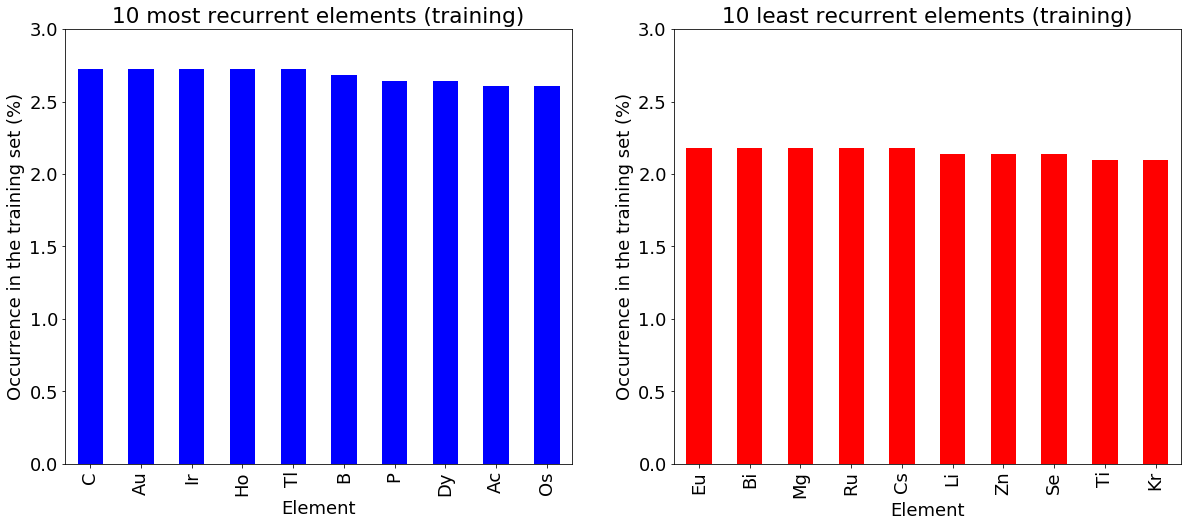

In [9]:
# Counting the occurrence of each element in training set
n_tot_element_train = train['formulaA'].value_counts()+train['formulaB'].value_counts()
n_tot_element_train = n_tot_element_train.sort_values(ascending=False)
n_tot_element_train = (n_tot_element_train/len(train['formulaA']))*100.0 # percentage over the total

# Plotbar of the 5 most recurrent and the 5 least recurrent elements 
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title('10 most recurrent elements (training)')
plt.xlabel('Element')
plt.ylabel('Occurrence in the training set (%)')
plt.ylim([0,3.0])
n_tot_element_train.head(10).plot(color='b', kind='bar')

plt.subplot(122)
plt.title('10 least recurrent elements (training)')
plt.xlabel('Element')
plt.ylabel('Occurrence in the training set (%)')
plt.ylim([0,3.0])
n_tot_element_train.tail(10).plot(color='r', kind='bar')

plt.show()

__Test set__

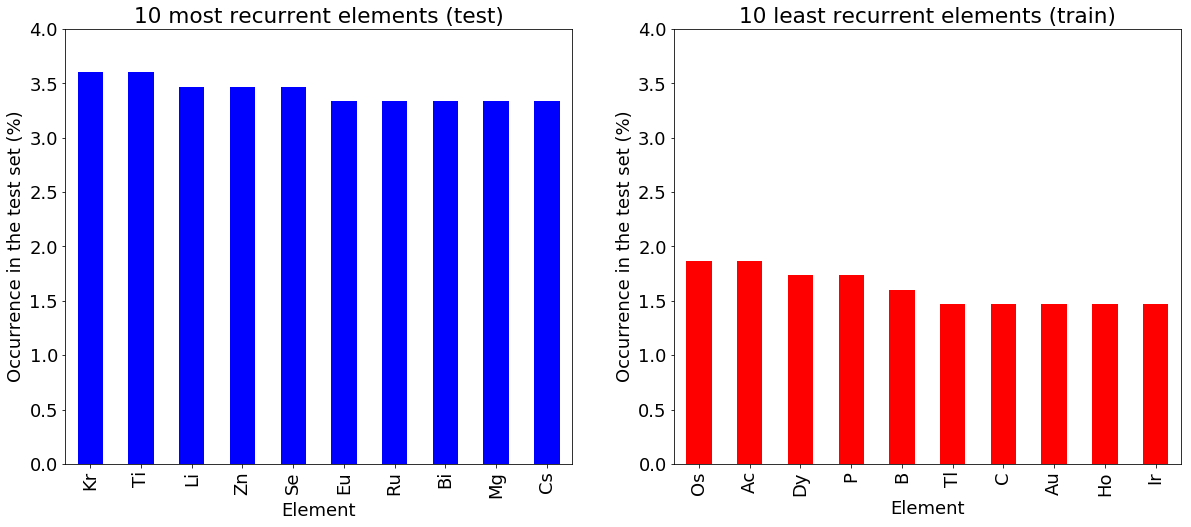

In [10]:
# Counting the occurrence of each element in training set
n_tot_element_test = test['formulaA'].value_counts()+test['formulaB'].value_counts()
n_tot_element_test = n_tot_element_test.sort_values(ascending=False)
n_tot_element_test = (n_tot_element_test/len(test['formulaA']))*100.0 # percentage over the total

# Plotbar of the 5 most recurrent and the 5 least recurrent elements 
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title('10 most recurrent elements (test)')
plt.xlabel('Element')
plt.ylabel('Occurrence in the test set (%)')
plt.ylim([0,4.0])
n_tot_element_test.head(10).plot(color='b', kind='bar')

plt.subplot(122)
plt.title('10 least recurrent elements (train)')
plt.xlabel('Element')
plt.ylabel('Occurrence in the test set (%)')
plt.ylim([0,4.0])
n_tot_element_test.tail(10).plot(color='r', kind='bar')

plt.show()

__Important remarks about question 1__ <br>
- The training set is fairly well balanced with the most and least occurring elements having a similar frequency always above 2%. This is not the case for the test set, but this is not really a problem as this test set is not used for training the model. 
- The fact that the top 10 of the training model is different from the top 10 of the test set might be a problem. For example, Se, Kr, and Eu are among the least frequent elements in the training set but among the most frequent frequent in the test set. Accordingly, we have to predict more for elements that have less training examples. 

__Question 2__ Are there elements that form many more compounds than others? Of course the expected reply is yes, as certain elements are more reactive than others.

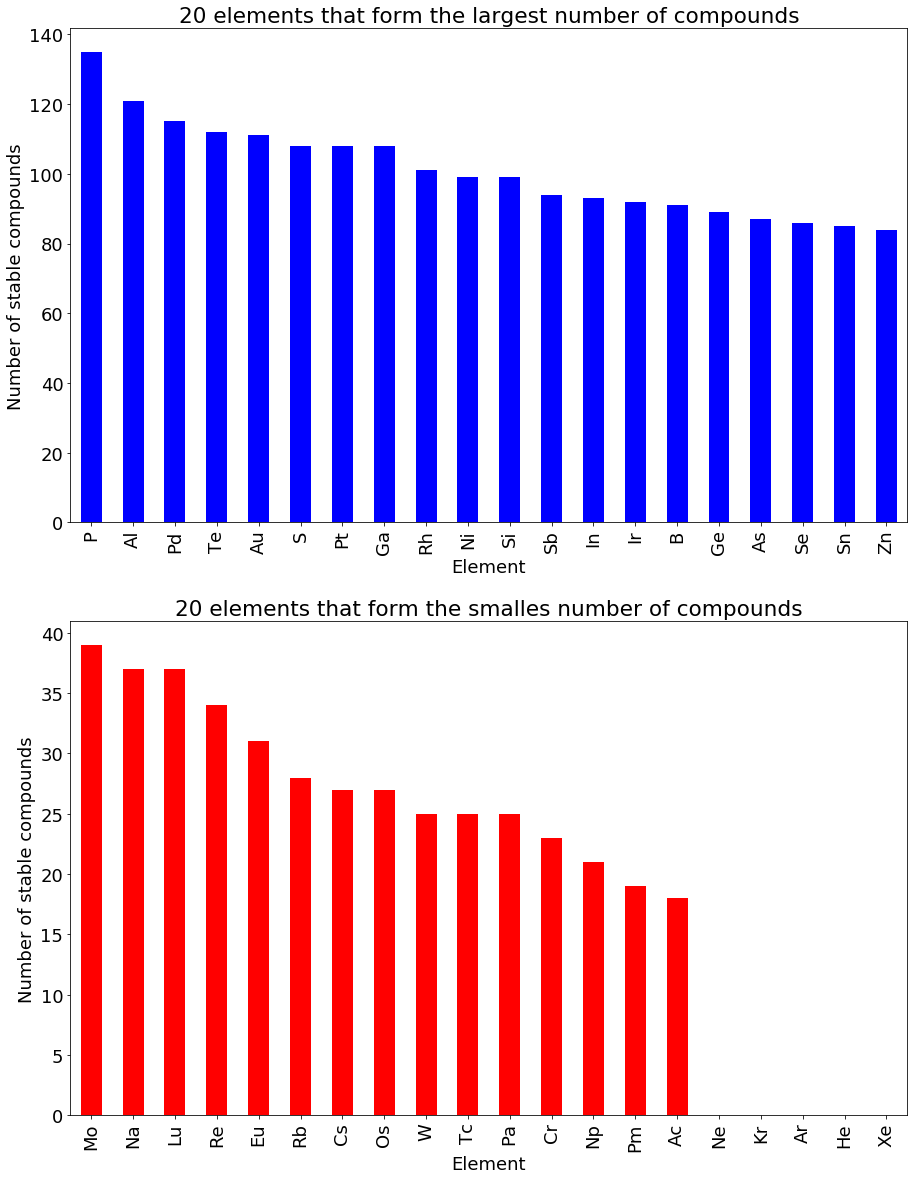

In [11]:
# For each binary combination of elements I'm counting the number of stable compound
n_stable_perline = [x.sum() for x in list_label_compound]

# Creating a new line in the train dataframe with this information
# This is useful for data manipulation
train['n_compounds'] = n_stable_perline

#Creating a series where each element A corresponds to the number of stable compounds it can form
n_compounds_A = train.groupby(['formulaA']).n_compounds.sum()

#Same thing for B
n_compounds_B = train.groupby(['formulaB']).n_compounds.sum()

# Sum for elements that appear both in formulaA and formulaB
n_compounds_per_element = n_compounds_A+n_compounds_B

# Sorting from the most "reactive" to the least
n_compounds_per_element = n_compounds_per_element.sort_values(ascending=False)

#Plotting the data
plt.figure(figsize=(15,20))

plt.subplot(211)
n_compounds_per_element.head(20).plot(kind='bar',color='b')
plt.title('20 elements that form the largest number of compounds')
plt.xlabel('Element')
plt.ylabel('Number of stable compounds')

plt.subplot(212)
n_compounds_per_element.tail(20).plot(kind='bar',color='r')
plt.title('20 elements that form the smalles number of compounds')
plt.xlabel('Element')
plt.ylabel('Number of stable compounds')
plt.show()

train = train.drop('n_compounds',axis=1)

__Important remark about question 2__ <br>
Not surprisingly I discovered that noble gases, which have closed shell and are known to be chemically inert, do not form any compound. Later I will need to verify that my model does not predict any compound to be stable with these chemical elements. 

__Question 3__ - How frequent are different mixing precentage (10%-90%, 20%-80%, etc.) for the stable compounds in the training set?

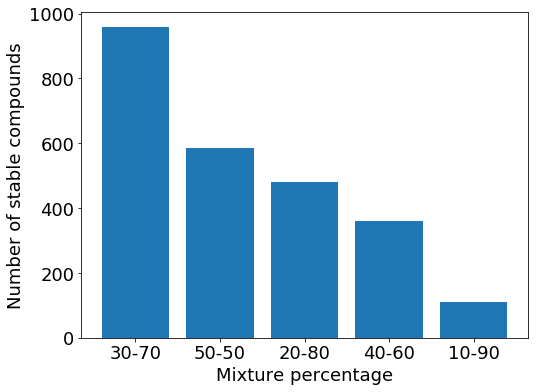

In [12]:
#In order to plot these data I create a dictionary {mixture percentage:number of compounds}
#I will consider 10%-90% equivalent to 90%-10%, 20%-80% equivalent to 80%-20%, etc.

dic_plot = {}
dic_plot['50-50'] = list_label_compound[:,4].sum()
dic_plot['40-60'] = (list_label_compound[:,3].sum()+list_label_compound[:,5].sum())
dic_plot['30-70'] = (list_label_compound[:,2].sum()+list_label_compound[:,6].sum())
dic_plot['20-80'] = (list_label_compound[:,1].sum()+list_label_compound[:,7].sum())
dic_plot['10-90'] = (list_label_compound[:,0].sum()+list_label_compound[:,8].sum())

# Plotting the data
plt.figure(figsize=(8,6))
plt.bar(range(len(dic_plot)), list(dic_plot.values()), align='center')
plt.ylabel('Number of stable compounds')
plt.xlabel('Mixture percentage')
plt.xticks(range(len(dic_plot)), list(dic_plot.keys()))
plt.show()

__Important remark__ <br>
There are large differences in this five classes and this has important implications in the accuracy of a model. As we want to reach a high accuracy on the full stability diagram (11 labels) the fact of having different training examples for each class means that we will also have different predictive power.

__Question 4__ - The discretized stability vector contains 11 entries. As the first two correspond to the stability of the pure elements I will not consider them here. How many stable compounds can we have in this vector at most for a given pair of elements? How often does a stability array occur that has no stable compounds, 1 stable compound, 2 stable compounds, etc.? 

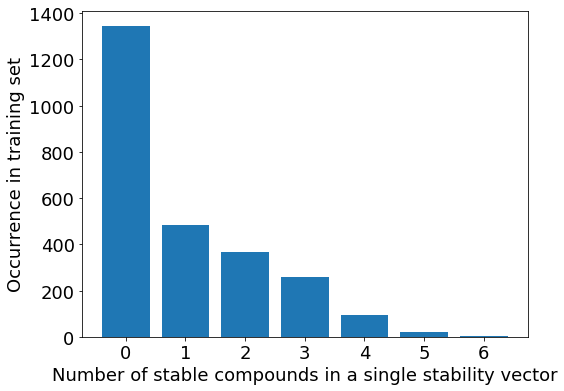

In [13]:
from collections import Counter

# n_stable_perline was previously defined and contains the number 
# of stable compound for each pair of elements
dic_plot_compound = Counter(n_stable_perline)

plt.figure(figsize=(8,6))
plt.bar(list(dic_plot_compound.keys()), list(dic_plot_compound.values()), align='center')
plt.xlabel('Number of stable compounds in a single stability vector')
plt.ylabel('Occurrence in training set')
plt.xticks(range(len(dic_plot_compound)), range(len(dic_plot_compound)))
plt.show()

__Important remarks__ <br>
- Not surprisingly the most recurrent stability vector contains all zeros <br>
- The element pairs Au-Ca and Pt-Al form 6 stable compounds with different mixture percentages <br>
- We have 20 element pairs that form 5 stable compounds